In [1]:
import os
import random
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image
import tensorflow as tf
from tensorflow.keras import datasets, layers, models, Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing import image
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from keras.models import Sequential
import pickle
from sklearn.metrics import confusion_matrix
import seaborn as sns


In [2]:
train_carnes = tf.keras.utils.image_dataset_from_directory(
    '/Users/stefanos2/Documents/Master UIDE/Modelos de aprendizaje /Examen final/CarneDataset/train',
    validation_split=0.2,  # Fracción de los datos para usar como conjunto de validación
    subset="training",      # Subconjunto a utilizar (en este caso, conjunto de entrenamiento)
    seed=123,               # Semilla para la división aleatoria de los datos
    image_size=(300,300)    # Tamaño de las imágenes de entrada
)


Found 1633 files belonging to 8 classes.
Using 1307 files for training.


['CLASS_01', 'CLASS_02', 'CLASS_03', 'CLASS_04', 'CLASS_05', 'CLASS_06', 'CLASS_07', 'CLASS_08']


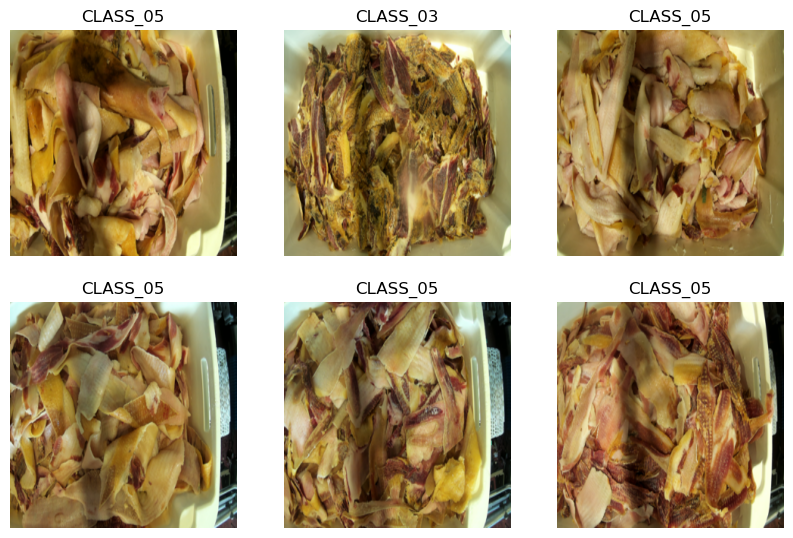

Número de lotes de entrenamiento: 41


In [3]:
# Obtener los nombres de las clases
class_names = train_carnes.class_names
print(class_names)

# Mostrar algunas imágenes de muestra con etiquetas
plt.figure(figsize=(10,10))
for images, labels in train_carnes.take(1):
    for i in range(6):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")
plt.show()

# Obtener el número de lotes de entrenamiento
num_batches = tf.data.experimental.cardinality(train_carnes).numpy()
print('Número de lotes de entrenamiento:', num_batches)


In [4]:
num_clases = len(class_names)
AUTOTUNE = tf.data.AUTOTUNE
train_dataset = train_carnes.prefetch(buffer_size=AUTOTUNE)

# Definir el modelo
modelo = tf.keras.models.Sequential([
    tf.keras.layers.Rescaling(1./255, input_shape=(300, 300, 3)),
    tf.keras.layers.Conv2D(16, 3, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(32, 3, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Flatten(), 
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(num_clases),
])

modelo.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 300, 300, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 300, 300, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 150, 150, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 150, 150, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 75, 75, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 75, 75, 64)        1

In [5]:
# Compilar y entrenar el modelo con el optimizador Adam
modelo.compile(optimizer='adam',
               loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
               metrics=['accuracy'])

historia_adam = modelo.fit(train_dataset, epochs=10)



Epoch 1/10
41/41 [==============================] - 11s 260ms/step - loss: 1.8139 - accuracy: 0.5593
Epoch 2/10
41/41 [==============================] - 10s 249ms/step - loss: 0.7907 - accuracy: 0.7054
Epoch 3/10
41/41 [==============================] - 10s 251ms/step - loss: 0.4170 - accuracy: 0.8500
Epoch 4/10
41/41 [==============================] - 10s 250ms/step - loss: 0.3481 - accuracy: 0.8829
Epoch 5/10
41/41 [==============================] - 10s 251ms/step - loss: 0.1635 - accuracy: 0.9464
Epoch 6/10
41/41 [==============================] - 10s 250ms/step - loss: 0.0471 - accuracy: 0.9878
Epoch 7/10
41/41 [==============================] - 10s 253ms/step - loss: 0.0315 - accuracy: 0.9939
Epoch 8/10
41/41 [==============================] - 10s 253ms/step - loss: 0.0110 - accuracy: 0.9985
Epoch 9/10
41/41 [==============================] - 10s 253ms/step - loss: 0.0049 - accuracy: 1.0000
Epoch 10/10
41/41 [==============================] - 10s 253ms/step - loss: 0.0025 - accura

In [6]:
# Compilar y entrenar el modelo con el optimizador Nadam
modelo.compile(optimizer='nadam',
               loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
               metrics=['accuracy'])

historia_nadam = modelo.fit(train_dataset, epochs=10)



Epoch 1/10
41/41 [==============================] - 11s 266ms/step - loss: 0.1649 - accuracy: 0.9732
Epoch 2/10
41/41 [==============================] - 11s 263ms/step - loss: 0.0034 - accuracy: 0.9992
Epoch 3/10
41/41 [==============================] - 11s 264ms/step - loss: 0.0016 - accuracy: 1.0000
Epoch 4/10
41/41 [==============================] - 11s 266ms/step - loss: 0.0011 - accuracy: 1.0000
Epoch 5/10
41/41 [==============================] - 11s 265ms/step - loss: 8.4025e-04 - accuracy: 1.0000
Epoch 6/10
41/41 [==============================] - 11s 267ms/step - loss: 6.7335e-04 - accuracy: 1.0000
Epoch 7/10
41/41 [==============================] - 11s 264ms/step - loss: 5.2625e-04 - accuracy: 1.0000
Epoch 8/10
41/41 [==============================] - 11s 266ms/step - loss: 4.4726e-04 - accuracy: 1.0000
Epoch 9/10
41/41 [==============================] - 11s 265ms/step - loss: 3.3948e-04 - accuracy: 1.0000
Epoch 10/10
41/41 [==============================] - 11s 266ms/step - l

In [7]:
# Compilar y entrenar el modelo con el optimizador Adamax
modelo.compile(optimizer='adamax',
               loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
               metrics=['accuracy'])

historia_adamax = modelo.fit(train_dataset, epochs=10)

Epoch 1/10
41/41 [==============================] - 11s 253ms/step - loss: 0.4742 - accuracy: 0.9281
Epoch 2/10
41/41 [==============================] - 10s 249ms/step - loss: 0.0127 - accuracy: 1.0000
Epoch 3/10
41/41 [==============================] - 10s 252ms/step - loss: 0.0077 - accuracy: 1.0000
Epoch 4/10
41/41 [==============================] - 10s 251ms/step - loss: 0.0057 - accuracy: 1.0000
Epoch 5/10
41/41 [==============================] - 11s 255ms/step - loss: 0.0047 - accuracy: 1.0000
Epoch 6/10
41/41 [==============================] - 11s 258ms/step - loss: 0.0037 - accuracy: 1.0000
Epoch 7/10
41/41 [==============================] - 10s 252ms/step - loss: 0.0029 - accuracy: 1.0000
Epoch 8/10
41/41 [==============================] - 11s 256ms/step - loss: 0.0022 - accuracy: 1.0000
Epoch 9/10
41/41 [==============================] - 10s 245ms/step - loss: 0.0017 - accuracy: 1.0000
Epoch 10/10
41/41 [==============================] - 10s 245ms/step - loss: 0.0014 - accura

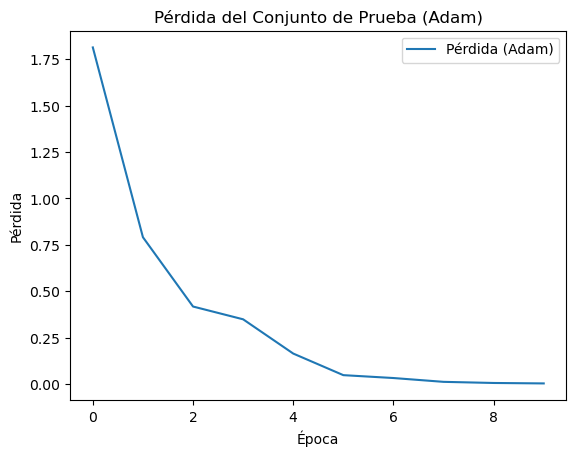

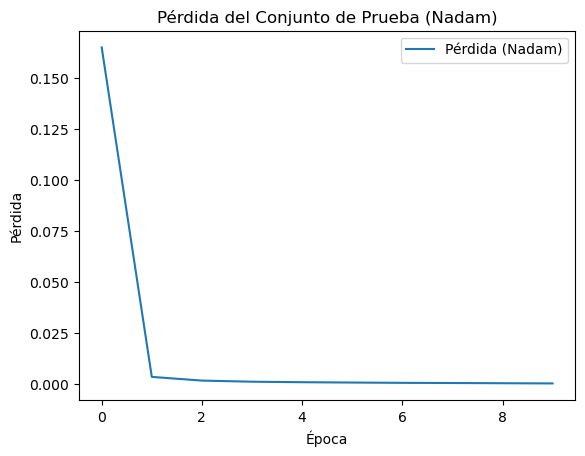

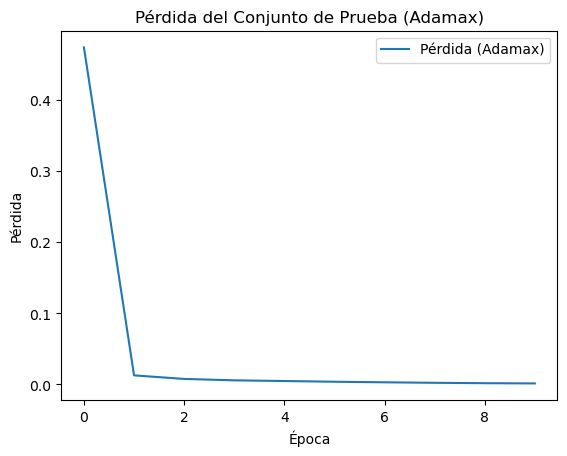

In [8]:
# Para el modelo con el optimizador Adam
plt.plot(historia_adam.history['loss'], label='Pérdida (Adam)')
plt.title('Pérdida del Conjunto de Prueba (Adam)')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.legend(loc='upper right')
plt.show()

# Para el modelo con el optimizador Nadam
plt.plot(historia_nadam.history['loss'], label='Pérdida (Nadam)')
plt.title('Pérdida del Conjunto de Prueba (Nadam)')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.legend(loc='upper right')
plt.show()

# Para el modelo con el optimizador Adamax
plt.plot(historia_adamax.history['loss'], label='Pérdida (Adamax)')
plt.title('Pérdida del Conjunto de Prueba (Adamax)')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.legend(loc='upper right')
plt.show()



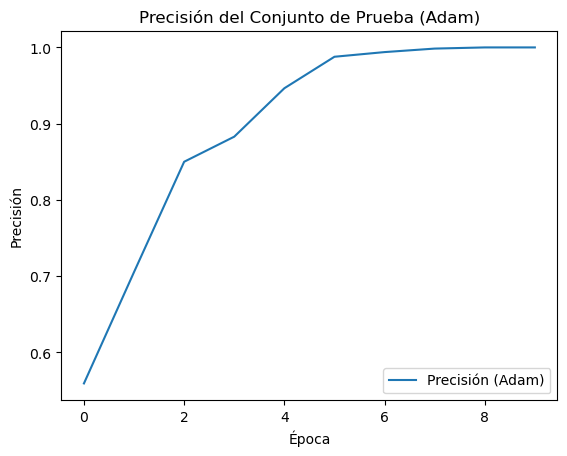

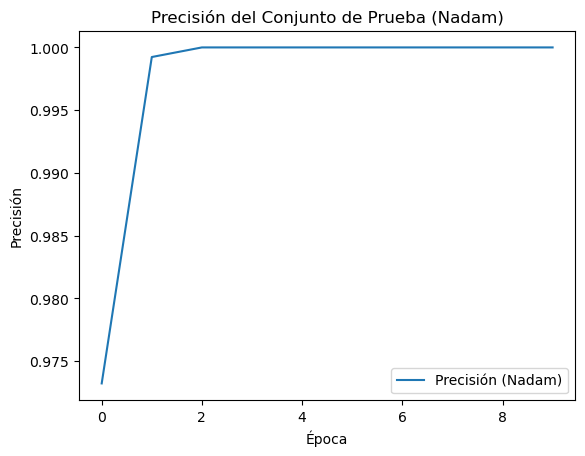

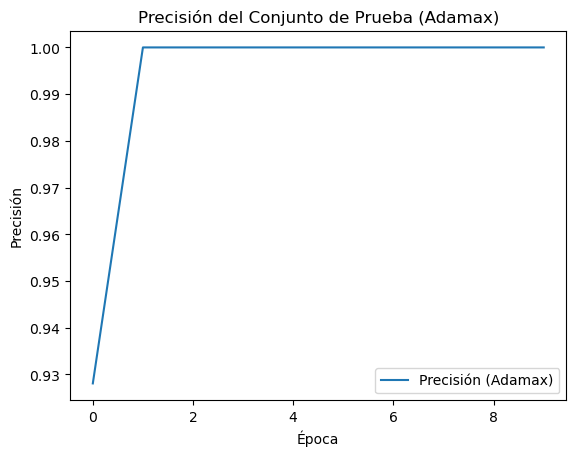

In [9]:
# Para el modelo con el optimizador Adam
plt.plot(historia_adam.history['accuracy'], label='Precisión (Adam)')
plt.title('Precisión del Conjunto de Prueba (Adam)')
plt.xlabel('Época')
plt.ylabel('Precisión')
plt.legend(loc='lower right')
plt.show()

# Para el modelo con el optimizador Nadam
plt.plot(historia_nadam.history['accuracy'], label='Precisión (Nadam)')
plt.title('Precisión del Conjunto de Prueba (Nadam)')
plt.xlabel('Época')
plt.ylabel('Precisión')
plt.legend(loc='lower right')
plt.show()

# Para el modelo con el optimizador Adamax
plt.plot(historia_adamax.history['accuracy'], label='Precisión (Adamax)')
plt.title('Precisión del Conjunto de Prueba (Adamax)')
plt.xlabel('Época')
plt.ylabel('Precisión')
plt.legend(loc='lower right')
plt.show()


In [10]:
# Guardar el modelo entrenado
modelo.save('modelo_adam.h5')

# Cargar el modelo guardado
modelo_cargado_adam = tf.keras.models.load_model('modelo_adam.h5')

# Imprimir el resumen del modelo cargado
print("Resumen del modelo cargado (Adam):")
modelo_cargado_adam.summary()


Resumen del modelo cargado (Adam):
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 300, 300, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 300, 300, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 150, 150, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 150, 150, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 75, 75, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)   

/Users/stefanos2/anaconda3/lib/python3.11/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [11]:
# Guardar el modelo entrenado
modelo.save('modelo_nadam.h5')

# Cargar el modelo guardado
modelo_cargado_nadam = tf.keras.models.load_model('modelo_nadam.h5')

# Imprimir el resumen del modelo cargado
print("\nResumen del modelo cargado (Nadam):")
modelo_cargado_nadam.summary()




Resumen del modelo cargado (Nadam):
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 300, 300, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 300, 300, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 150, 150, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 150, 150, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 75, 75, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D) 

In [12]:
# Guardar el modelo entrenado
modelo.save('modelo_adamax.h5')

# Cargar el modelo guardado
modelo_cargado_adamax = tf.keras.models.load_model('modelo_adamax.h5')

# Imprimir el resumen del modelo cargado
print("\nResumen del modelo cargado (Adamax):")
modelo_cargado_adamax.summary()


Resumen del modelo cargado (Adamax):
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 300, 300, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 300, 300, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 150, 150, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 150, 150, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 75, 75, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)

## Test
Una vez revisados los 3 modelos se descarta el uso de nadam, por que no esta entrenando de una manera correcta los datos. 


In [13]:
# Cargar datos de prueba
test_carnes = tf.keras.utils.image_dataset_from_directory(
    '/Users/stefanos2/Documents/Master UIDE/Modelos de aprendizaje /Examen final/CarneDataset/test',
    seed=123,               # Semilla para la división aleatoria de los datos
    image_size=(300,300),   # Tamaño de las imágenes de entrada
    batch_size=32           # Tamaño del lote
)

Found 810 files belonging to 8 classes.


In [14]:
# Prefetch de datos de prueba
AUTOTUNE = tf.data.AUTOTUNE
test_dataset = test_carnes.prefetch(buffer_size=AUTOTUNE)

# Cargar modelos entrenados
modelo_adam = tf.keras.models.load_model('modelo_adam.h5')
modelo_adamax = tf.keras.models.load_model('modelo_adamax.h5')

# Evaluar modelos en datos de prueba
resultado_adam = modelo_adam.evaluate(test_carnes)
print("Resultados del modelo con optimizador Adam:")
print("Pérdida en test:", resultado_adam[0])
print("Precisión en test:", resultado_adam[1])

resultado_adamax = modelo_adamax.evaluate(test_carnes)
print("\nResultados del modelo con optimizador Adamax:")
print("Pérdida en test:", resultado_adamax[0])
print("Precisión en test:", resultado_adamax[1])

26/26 [==============================] - 2s 67ms/step - loss: 0.5005 - accuracy: 0.8852
Resultados del modelo con optimizador Adam:
Pérdida en test: 0.5004922747612
Precisión en test: 0.885185182094574
26/26 [==============================] - 2s 66ms/step - loss: 0.5005 - accuracy: 0.8852

Resultados del modelo con optimizador Adamax:
Pérdida en test: 0.5004923343658447
Precisión en test: 0.885185182094574


26/26 [==============================] - 2s 67ms/step


<Figure size 1000x800 with 0 Axes>

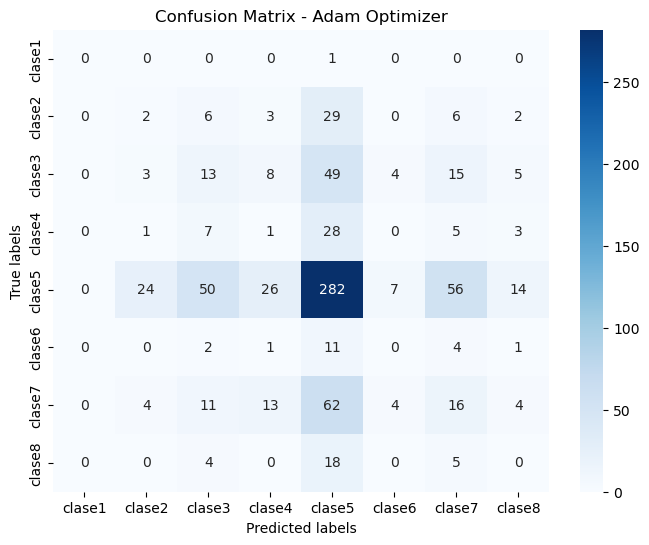

<Figure size 1000x800 with 0 Axes>

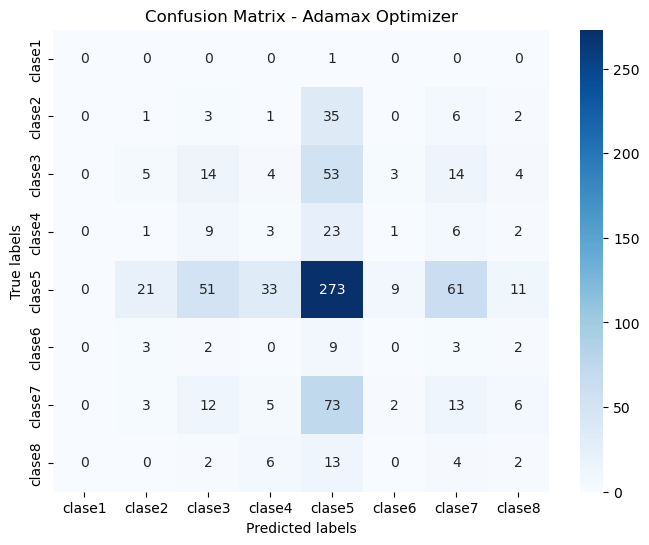

In [16]:
# Definir una función para visualizar la matriz de confusión
def plot_confusion_matrix(confusion_matrix, labels):
    plt.figure(figsize=(8, 6))
    sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title('Confusion Matrix')

# Calcular la matriz de confusión para el modelo con optimizador Adam
predictions_adam = modelo_adam.predict(test_dataset)
true_labels_adam = np.concatenate([y for _, y in test_dataset], axis=0)
matriz_confusion_adam = tf.math.confusion_matrix(true_labels_adam, np.argmax(predictions_adam, axis=1))

# Calcular la matriz de confusión para el modelo con optimizador Adamax
predictions_adamax = modelo_adamax.predict(test_dataset)
true_labels_adamax = np.concatenate([y for _, y in test_dataset], axis=0)
matriz_confusion_adamax = tf.math.confusion_matrix(true_labels_adamax, np.argmax(predictions_adamax, axis=1))

# Visualizar matrices de confusión
class_names = ['clase1', 'clase2', 'clase3', 'clase4', 'clase5', 'clase6', 'clase7', 'clase8']

plt.figure(figsize=(10, 8))
plot_confusion_matrix(matriz_confusion_adam, labels=class_names)
plt.title('Confusion Matrix - Adam Optimizer')
plt.show()

plt.figure(figsize=(10, 8))
plot_confusion_matrix(matriz_confusion_adamax, labels=class_names)
plt.title('Confusion Matrix - Adamax Optimizer')
plt.show()
